IMPORT LIBRARIES

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

from sklearn.cluster import DBSCAN


LOAD DATASET

In [10]:
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Data Prepcessing

In [11]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Standardizing the features

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Determine the optimal number of clusters using Elbow Method

In [13]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

Plot Elbow Method

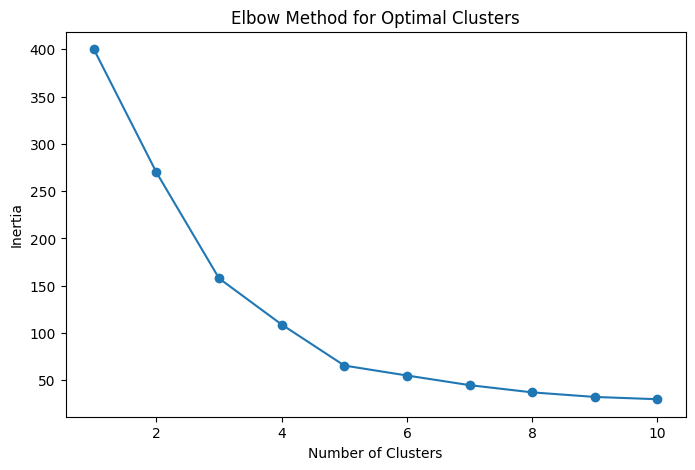

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

MODEL TRAIN

In [15]:
optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

Visulize the cluster

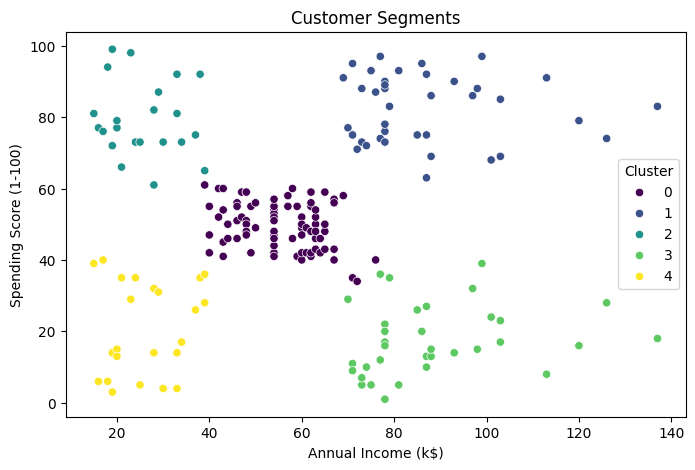

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend(title='Cluster')
plt.show()

Calculate Silhouette Score and Davies-Bouldin Index

In [17]:

silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg:.4f}')

db_index = davies_bouldin_score(X_scaled, df['Cluster'])
print(f'Davies-Bouldin Index: {db_index:.4f}')

Silhouette Score for 5 clusters: 0.5547
Davies-Bouldin Index: 0.5722


APPLY DBSCAN

In [18]:

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps for better clustering
df['Cluster'] = dbscan.fit_predict(X_scaled)

# Count clusters
print("Cluster counts:\n", df['Cluster'].value_counts())


if len(set(df['Cluster'])) > 1:
    silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
    print(f'Silhouette Score: {silhouette_avg:.4f}')
else:
    print("Silhouette Score not applicable (only one cluster detected).")





Cluster counts:
 Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64
Silhouette Score: 0.3504


Visual clusters

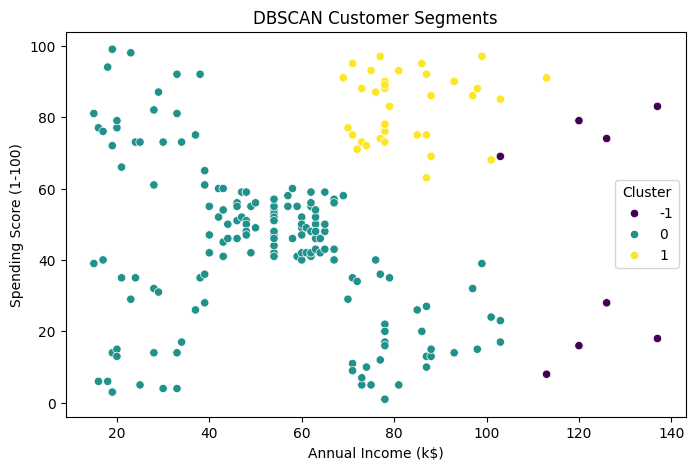

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Customer Segments')
plt.legend(title='Cluster')
plt.show()